In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터셋을 로드합니다.
boston = load_boston()

#boston 데이터셋 DataFrame으로 변환

boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)

#boston dataset의 target array는 주택 가격입니다.
#우리가 구해야 할 것
#이를 PRICE 컬럼으로 DataFrame에 추가하도록 하겠습니다.
boston_df['PRICE']=boston.target

print('Boston 데이터셋의 크기 :',boston_df.shape)
boston_df.head()

Boston 데이터셋의 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Boston Dataset의 meta data Information

- CRIM : 지역의 범죄 발생률
- ZN : 25,000 평방 피트를 초과하는 거주지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방의 개수
- AGE : 1940년 이전에 건축된, 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000$ 당 재산세율
- PTRATIO : 지역의 교사와 학생 수에 대한 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유 주택의 가격(중간값)

#### 각 컬럼(Wn) 별로 주택 가격에 미치는 영향도를 조사

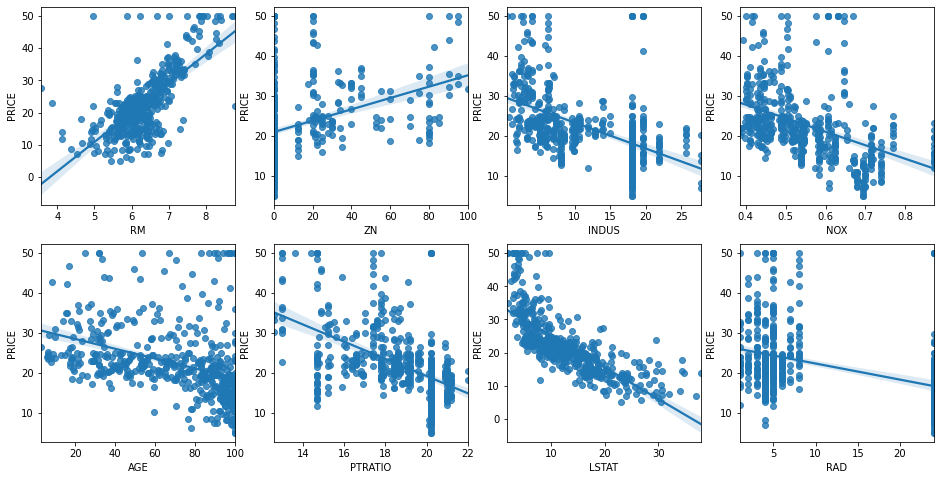

In [4]:
# 2개의 행과 4개의 열을 가진 subplot을 이용, axs는 4,2개의 ax를 가짐

fig,axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)

Im_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(Im_features):
    row = int(i/4)
    col = i%4
    
    #Seaborn의 regplot을 이용하여 산점도와 선형 회귀 직선을 함께 표현
    #sns.regplot(x=feature,y='PRICE',data=boston_df,ax=axs[row][col])
    sns.regplot(x=feature,y='PRICE',data=boston_df,ax=axs[row][col])
    #회귀 직선을 그려준다. 

#### <대략적인 느낌>

- 전반적으로 RAD를 제외한 나머지 feature들은 어느 정도 경향성을 따라가고 있음
- ZN 역시 우상향이고 INDUS는 우하향의 회귀곡선을 보인다. NOX,AGE,PTRATIO,LSTAT 등도 마찬가지인데,
- LSTAT이 가장 큰 우하향 관계를 보이고 있다. 
- 하위 계층 거지들이 큰 관련이 있음을 알 수 있다.

#### 학습과 테스트 데이터셋으로 분리하고, 학습/예측/평가를 수행

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = boston_df['PRICE']

X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.2,random_state = 156)

#Linear Regression OLS로, 학습 / 예측 / 평가 수행
lr = LinearRegression()

lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test,y_preds)
#mean_squared_error로 예측 오류값을 mse에 저장


rmse = np.sqrt(mse)
#rmse는 사이킷런에서 제공하지 않으므로
#mse에 Root를 씌워서 정의해줘야 한다.

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 18.140, RMSE : 4.259
Variance score : 0.785


In [6]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 39.29051011945228
회귀 계수값: [ -0.1   0.1   0.    2.8 -20.1   3.4   0.   -1.6   0.3  -0.   -0.9   0.
  -0.5]


In [7]:
#회귀 계수를 큰 값 순서대로 정렬하기 위해 Series로 생성

coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        2.8
RAD         0.3
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.6
NOX       -20.1
dtype: float64

#### 회귀 계수의 절댓값이 크면 클 수록 영향이 크다?!

#### 이번에는 cross_val_score를 통해 교차 검증을 해보도록 하겠습니다.

- 이를 통해 평균 mse를 구할 수 있다.

In [8]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)

lr = LinearRegression()

#cross_val_score()로 다섯 개의 Fold 세트로 MSE를 구한 후
#이를 기반으로 다시 RMSE를 구합니다.

neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring = "neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
#큰 값일수록 좋은 scoring value로 사이킷런은 인지를 한다.
# 회귀는 작은 값, 즉 예측과 오류의 차이가 작을수록 모델이 좋다고 받아들임
#neg_mse_scores는 모두 음수의 값을 가지고 있음

avg_rmse = np.mean(rmse_scores)


#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수입니다.

print(' 5 folds 의 개별 Negative MSE scores :',np.round(neg_mse_scores,2))
print(' 5 folds 의 개별 RMSE scores :',np.round(rmse_scores,2))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829


### Polynomial Regression // Overfitting & Underfitting 

#### Polynomial Regression 이해

 - Polynomial Features 클래스로 다항식 변환
 
 1차 단항 피처들의 값이 [x1,x2] = [0,1] 일 경우
 
 2차 다항 피처들의 값은 [1,x1=0,x2=1,x1x2=0,x1^2=0,x2^2=1] 형태인 [1,0,1,0,0,1]로 변환

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환된 단항식을 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)

print('일차 단항식 계수 feature:\n',X)

#degree = 2 인 2차 다항식으로 변환하기 위해, PolynomialFeatrues를 이용하여 변환

poly = PolynomialFeatures(degree=2)
poly.fit(X)

poly_ftr = poly.transform(X)

print('변환된 2차 다항식 계수 feature:\n',poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


#### 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+2x_1+3x_1^2+4x_2^3

In [12]:
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y
    
X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature :\n',X)

y = polynomial_func(X)
print('삼차 다항식 결정값 :\n', y)
#0,1을 집어넣으면 5, 2,3을 집어넣으면 125
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)


#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()

model.fit(poly_ftr, y)

print('Polynomial 회귀 계수 \n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape :',model.coef_.shape)



일차 단항식 계수 feature :
 [[0 1]
 [2 3]]
삼차 다항식 결정값 :
 [  5 125]
3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


#### 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

In [13]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)

print('Polynomial 회귀 계수\n',np.round(model.coef_,8))

print('Polynomial 회귀 Shape :',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.         0.18018018 0.18018018 0.36036036 0.54054054 0.72072072
 0.72072072 1.08108108 1.62162162 2.34234234]
Polynomial 회귀 Shape : (10,)


#### Sckitlearn Pipeline을 이용하여 3차 다항회귀 학습

- 사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 전부 결합

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y


# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결

model = Pipeline([('poly',PolynomialFeatures(degree=3)),
                  ('linear',LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))




Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다중 회귀를 이용한 보스턴 주택가격 예측

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import tensorflow 

# boston 데이터셋 로드
boston = load_boston()

#boston 데이터셋 DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data,columns = boston.feature_names)

#boston dataset의 target array는 주택 가격입니다. 이를 PRICE컬럼으로 DataFrame에 추가합니다.

bostonDF['PRICE'] = boston.target
print('Boston 데이터셋의 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace = False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,random_state=156)


## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합
p_model = Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),
                    ('linear',LinearRegression())])

p_model.fit(X_train,y_train)

y_preds = p_model.predict(X_test)

mse = mean_squared_error(y_test,y_preds)

rmse = np.sqrt(mse)


print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

Boston 데이터셋의 크기 : (506, 14)
MSE : 15.556, RMSE : 3.944
Variance score : 0.782


In [20]:
X_train_poly = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X_train,y_train)

X_train_poly.shape, X_train.shape

((354, 104), (354, 13))